In [1]:
import numpy as np
import cv2,math
from matplotlib import pyplot as plt
%matplotlib inline
print (cv2.__version__)

3.1.0


In [10]:
webcam = cv2.VideoCapture(0)
ret, frame = webcam.read()  # when you get blank pic the repeat this command 
cv2.waitKey(1000) # when you get blank pic the repeat this command
ret, frame = webcam.read() # when you get blank pic the repeat this command
print(ret)
webcam.release()

False


In [4]:
cv2.startWindowThread()

# create window to hold pic
cv2.namedWindow("Python_pic", cv2.WINDOW_NORMAL)
cv2.imshow("Python_pic", frame)
cv2.waitKey()
cv2.destroyAllWindows()
print(type(frame))

<class 'numpy.ndarray'>


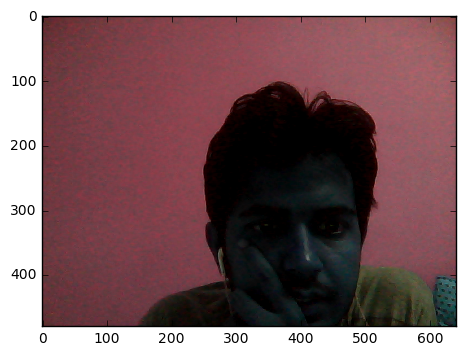

In [5]:
plt.imshow(frame)
plt.show()

In [6]:
def plot_show(image, title=""):
    if len(image.show) == 3:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

In [7]:
# start video
webcam = cv2.VideoCapture(0)
print(webcam.isOpened())

True


In [8]:
cv2.namedWindow("Python webcam",cv2.WINDOW_NORMAL)
while True:
    _, frame = webcam.read()
    cv2.imshow("Python webcam", frame)
    # code 27 press Esc
    if cv2.waitKey(20) & 0xFF == 27 :
        break
    
cv2.destroyAllWindows()
# even you have stop the video but still camera is on

In [11]:
# model allow session in notebook
from IPython.display import clear_output
try:
    while True:
        _, frame = webcam.read()
        plt.show(frame)
        clear_output(wait=True)
except KeyboardInterrupt:
    print ("live video interrpted")

live video interrpted


In [8]:
webcam.release()

AttributeError: 'VideoCamera' object has no attribute 'release'

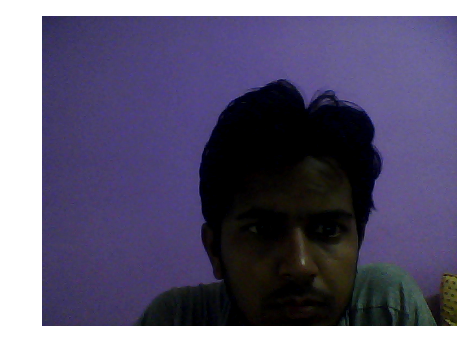

In [12]:
webcam = cv2.VideoCapture(0)
_, frame = webcam.read()  # when you get blank pic the repeat this command 
cv2.waitKey(1000) # when you get blank pic the repeat this command
_, frame = webcam.read() # when you get blank pic the repeat this command
webcam.release()
plot_show(frame)

In [13]:
detector = cv2.CascadeClassifier('C:\/Users\/abhishek\Desktop\haarcascade_frontalface_default.xml')
scale_factor = 1.2
min_neighbors = 5
min_size = (30,30)
biggest_only = True
flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
        cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
        cv2.CASCADE_SCALE_IMAGE
face_coord = detector.detectMultiScale(frame,scaleFactor=scale_factor,minNeighbors=min_neighbors,
                                      minSize=min_size,flags=flags)
print("Type: " + str(type(face_coord))) # each face location
print(face_coord)
print("Lenght: " + str(len(face_coord))) # number of face i got it 

TypeError: image is not a numpy array, neither a scalar

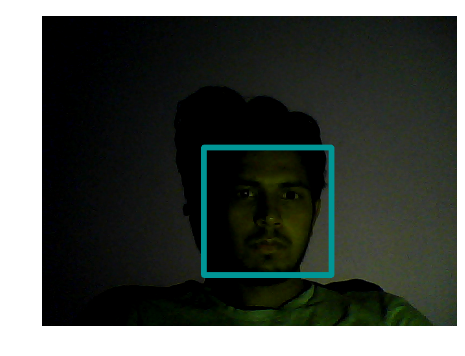

In [18]:
for (x,y,w,h) in face_coord:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(150, 150, 0), 8)

plot_show(frame)

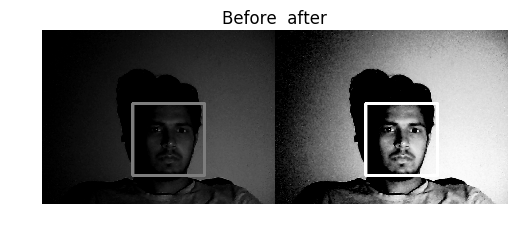

In [24]:
face_bw = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
face_bw_eq = cv2.equalizeHist(face_bw)
plot_show(np.hstack((face_bw,face_bw_eq)),"Before  after")

In [1]:
import sys,os
import numpy as np
import cv2,math
from matplotlib import pyplot as plt
%matplotlib inline
print (cv2.__version__)
from IPython.display import YouTubeVideo
import cv2
import numpy as np
import os
import math
from matplotlib import pyplot as plt
from IPython.display import clear_output

def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()
    
class FaceDetector(object):
    def __init__(self, xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)
    
    def detect(self, image, biggest_only=True):
        scale_factor = 1.2
        min_neighbors = 5
        min_size = (30, 30)
        biggest_only = True
        flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
                    cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
                    cv2.CASCADE_SCALE_IMAGE
        faces_coord = self.classifier.detectMultiScale(image,
                                                       scaleFactor=scale_factor,
                                                       minNeighbors=min_neighbors,
                                                       minSize=min_size,
                                                       flags=flags)
        return faces_coord
    
class VideoCamera(object):
    def __init__(self, index=0):
        self.video = cv2.VideoCapture(index)
        self.index = index
        print (self.video.isOpened())

    def __del__(self):
        self.video.release()
    
    def get_frame(self, in_grayscale=False):
        _, frame = self.video.read()
        if in_grayscale:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        return frame

def cut_faces(image, faces_coord):
    faces = []
    
    for (x, y, w, h) in faces_coord:
        w_rm = int(0.3 * w / 2)
        faces.append(image[y: y + h, x + w_rm: x + w - w_rm])
         
    return faces

def normalize_intensity(images):
    images_norm = []
    for image in images:
        is_color = len(image.shape) == 3 
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

def resize(images, size=(50, 50)):
    images_norm = []
    for image in images:
        if image.shape < size:
            image_norm = cv2.resize(image, size, 
                                    interpolation=cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image, size, 
                                    interpolation=cv2.INTER_CUBIC)
        images_norm.append(image_norm)

    return images_norm

def normalize_faces(frame, faces_coord):
    faces = cut_faces(frame, faces_coord)
    faces = normalize_intensity(faces)
    faces = resize(faces)
    return faces

def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        w_rm = int(0.2 * w / 2) 
        cv2.rectangle(image, (x + w_rm, y), (x + w - w_rm, y + h), 
                              (150, 150, 0), 8)

def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
    people = [person for person in os.listdir("A:\people\/")]
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("A:\people\/" + person):
            images.append(cv2.imread("A:\people\/" + person + '/' + image, 0))
            labels.append(i)
    return (images, np.array(labels), labels_dic)


#webcam = VideoCamera()
detector = FaceDetector('C:\/Users\/abhishek\Desktop\haarcascade_frontalface_default.xml')

3.1.0


3.1.0
True
person:sonu


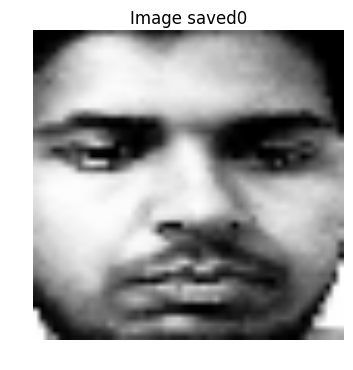

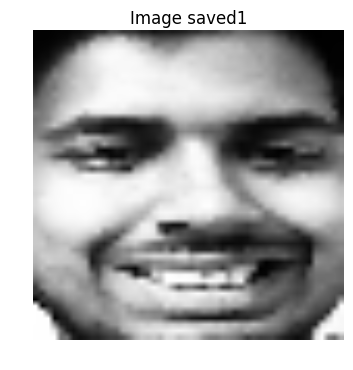

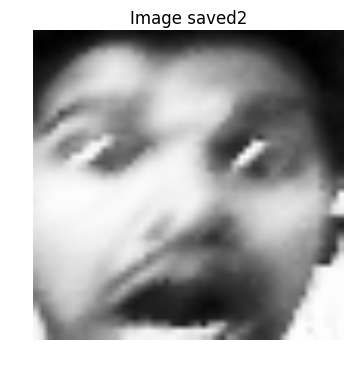

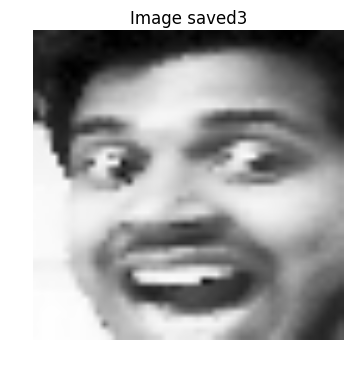

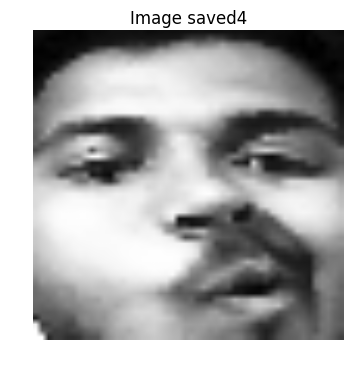

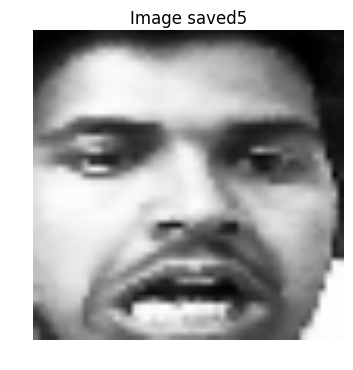

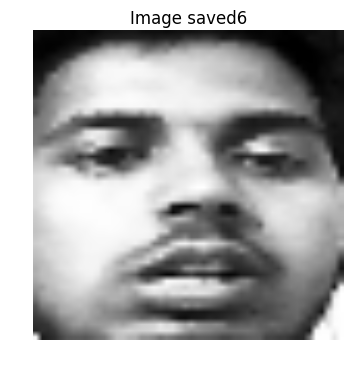

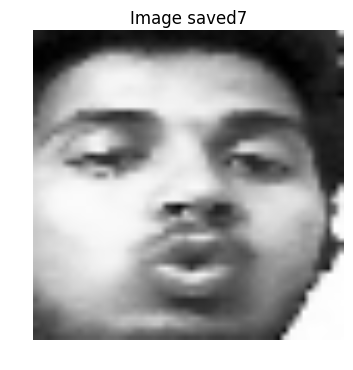

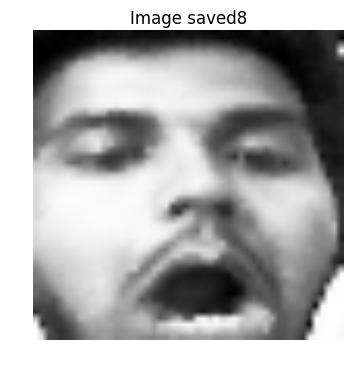

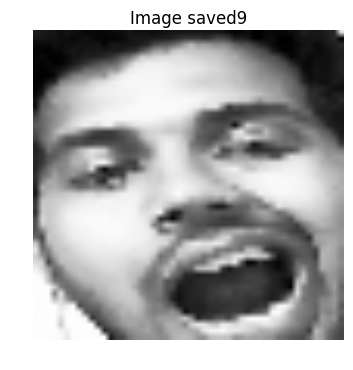

In [2]:
import sys,os
import numpy as np
import cv2,math
from matplotlib import pyplot as plt
%matplotlib inline
print (cv2.__version__)

webcam = VideoCamera()
detector = FaceDetector('C:\/Users\/abhishek\Desktop\haarcascade_frontalface_default.xml')
#webcam = cv2.VideoCapture(0)
folder = "A:\people\/" + input('person:').lower() # input name
cv2.namedWindow("Python video",cv2.WINDOW_AUTOSIZE)
if not os.path.exists(folder):
    os.mkdir(folder)
    counter = 0
    timer = 0
    while counter < 10 : # take 20 photo
        frame = webcam.get_frame()
        face_coord = detector.detect(frame) # detected
        if len(face_coord) and timer % 700 == 50: # every second or so
            faces = normalize_faces(frame, face_coord) # norm pipeline
            cv2.imwrite(folder + '\/' + str(counter) + '.jpg', faces[0])
            plt_show(faces[0],"Image saved" + str(counter))
            clear_output(wait=True)
            counter+=1
        draw_rectangle(frame,face_coord)
        cv2.imshow("python", frame)
        cv2.waitKey(50)
        timer +=50
    cv2.destroyAllWindows()
else:

    print("name is already")

In [2]:
images, labels, labels_dic = collect_dataset()

rec_eig = cv2.face.createEigenFaceRecognizer()
rec_eig.train(images, labels)

# needs at least two people 
rec_fisher = cv2.face.createFisherFaceRecognizer()
rec_fisher.train(images, labels)

rec_lbph = cv2.face.createLBPHFaceRecognizer()
rec_lbph.train(images, labels)

print ("Models Trained Succesfully")

Models Trained Succesfully


In [24]:
detector = FaceDetector('C:\/Users\/abhishek\Desktop\haarcascade_frontalface_default.xml')
webcam = VideoCamera(0)

True


In [11]:
del webcam

In [3]:
def draw_label(image, text, coord, conf, threshold):
    if conf < threshold: # apply threshold 
        cv2.putText(image, text.capitalize(),
                    coord,
                    cv2.FONT_HERSHEY_PLAIN, 3, (66, 53, 243), 2)
    else:
        cv2.putText(image, "Unknown",
                    coord,
                    cv2.FONT_HERSHEY_PLAIN, 3, (66, 53, 243), 2)

In [4]:
def live_recognition(index, webcam):
    global double_frame
    detector = FaceDetector('C:\/Users\/abhishek\Desktop\haarcascade_frontalface_default.xml')
    while True:
        frame = webcam.get_frame()
        faces_coord = detector.detect(frame, False) # detect more than one face
        if len(faces_coord):
            faces = normalize_faces(frame, faces_coord) # norm pipeline
            for i, face in enumerate(faces): # for each detected face
                collector = cv2.face.MinDistancePredictCollector()
                rec_lbph.predict(face, collector)
                conf = collector.getDist()
                pred = collector.getLabel()
                threshold = 140
                draw_label(frame, labels_dic[pred], 
                           (faces_coord[i][0], faces_coord[i][1] - 10), 
                           conf, threshold)
            draw_rectangle(frame, faces_coord) # rectangle around face
        cv2.putText(frame, "ESC to exit", (5, frame.shape[0] - 5),
                    cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2, 
                    cv2.LINE_AA)
        if index == 0:
            cv2.putText(frame, "Laptop", (frame.shape[1] - 100, 30),
                        cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2, cv2.LINE_AA)
        else:
            cv2.putText(frame, "External", (frame.shape[1] - 120, 30),
                        cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2, cv2.LINE_AA)
        double_frame[0 : 481, index * 640 : (index +1 ) * 640] = frame # copy new frame to FS
        cv2.imshow("PyData Tutorial", double_frame) # live feed in external
        if cv2.waitKey(30) & 0xFF == 27:
            break

In [ ]:
from threading import Thread
cv2.namedWindow("PyData Tutorial", cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty("PyData Tutorial", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
#cv2.namedWindow("PyData Tutorial 1", cv2.WINDOW_AUTOSIZE)

webcam_0 = VideoCamera(0)
#webcam_1 = VideoCamera(1)

single_frame = np.zeros_like(webcam_0.get_frame())
double_frame = np.hstack((single_frame, single_frame))

thread_0 = Thread(target = live_recognition, args = (0, webcam_0))
#thread_1 = Thread(target = live_recognition, args = (1, webcam_1))
thread_0.start()
#thread_1.start()
#thread_1.join()
thread_0.join()
del webcam_0
#del webcam_1
cv2.destroyAllWindows()

True


In [ ]:
del webcam_0
cv2.destroyAllWindows()